In [2]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")

### Order of operations to handle your own image data
- Import the data
- Create a custom DataSet Class
- Define the transformations
- Create a DataSet with your data and transformations
- Create a DataLoader

In [3]:
mnist_data = torchvision.datasets.MNIST("../data")
data = [x[0] for x in mnist_data]
labels = [x[1] for x in mnist_data]

In [4]:
data_np = np.array(data)
labels_np = np.array(labels)
data_np.shape, labels_np.shape

((60000, 28, 28), (60000,))

In [5]:
data_norm_np = data_np / np.max(data_np)

In [6]:
data_norm_np = data_norm_np.reshape(data_norm_np.shape[0], 1, 28, 28)

In [13]:
data_t = torch.tensor(data_norm_np).float()
labels_t = torch.tensor(labels_np).long()

In [14]:
data_t.shape, labels_t.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([60000]))

### Custom DataSet

In [35]:
class MyDataSet(Dataset):
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == t.size(0) for t in tensors), "Size mismatch between tensors"
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        # apply transformation if existing
        x = self.tensors[0][index]
        if self.transform:
            x = self.transform(x)
        y = self.tensors[1][index]
        return x, y
    
    def __len__(self):
        return self.tensors[0].size(0)

In [36]:
# Many transformations only apply to PIL format.
# So its common to convert to PIL apply transformation and then convert to Tensor
img_ts = T.Compose([
    T.ToPILImage(),
    T.RandomVerticalFlip(p=.5),
    T.ToTensor(),
])

In [48]:
# Using our custom dataset
train_data = MyDataSet((data_t, labels_t), img_ts)

In [49]:
type(train_data)

__main__.MyDataSet

In [50]:
data_t[0].shape

torch.Size([1, 28, 28])

In [51]:
train_loader = DataLoader(train_data, shuffle=False, batch_size=8, drop_last=True)

In [52]:
t = next(iter(train_loader))
type(t)

list

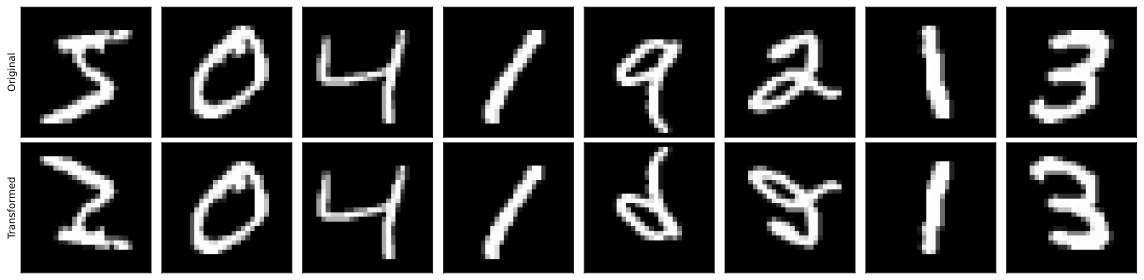

In [53]:
x, y = next(iter(train_loader))

fig, axs = plt.subplots(2, 8, figsize=(16, 4))

for i in range(8):
    axs[0, i].imshow(data_t[i, 0, :, :].detach(), cmap="gray")
    axs[1, i].imshow(x[i, 0, :, :].detach(), cmap="gray")

    for row in range(2):
        axs[row, i].set_xticks([])
        axs[row, i].set_yticks([])

axs[0, 0].set_ylabel("Original")
axs[1, 0].set_ylabel("Transformed")
plt.tight_layout()
plt.show()

In [54]:
len(train_data)

60000